## Logistic Regression on Audio Data

Logistic Regression is a popular classification algorithm.  In this episode we discuss how it can be used to determine if an audio clip represents one of two given speakers.  It assumes an output variable (isLinhda) is a linear combination of available features, which are spectral bands in the discussion on this episode.

The model takes this form:

$\text{log} \Bigg( \dfrac{p}{1-p} \Bigg) = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + ... + \beta_n \cdot X_n$

The algorithm uses maximum likelihood to find the optimal values for the parameters $\beta_i$.  The left side of that equation uses the logistic function to transform the output, and a threshold is established to define the classification.

The figures below are referenced during the episode.

Keep an eye on the dataskeptic.com blog this week as we post more details about this project.

### Sponsor
<div class="row">
    <div class="col-xs-12 col-sm-4">
    <a href="http://www.datascienceassociations.org/"><img src="https://s3.amazonaws.com/dataskeptic.com/img-static/data-sci-assn.png" /></a>
    </div>
    <div class="col-xs-12 col-sm-8">
    <h3>Data Science Assocation</h3>
    This episode was sponsored by the [Data Science Association](http://www.datascienceassociations.org/).  Sign up for their Data Science Conference Saturday, Feburary 18, 2017 by visiting [dallasdatascience.eventbrite.com](http://dallasdatascience.eventbrite.com).
    </div>
</div>

Supplemental music for this episode comes is [Chris Zabriskie's](http://chriszabriskie.com/) [Air Hockey Saloon](https://www.youtube.com/watch?v=WXF08uMa8mM).

<hr/>

The figures below are referenced in this week's episode.

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.fftpack import fft
import os
import scipy.io.wavfile as wav

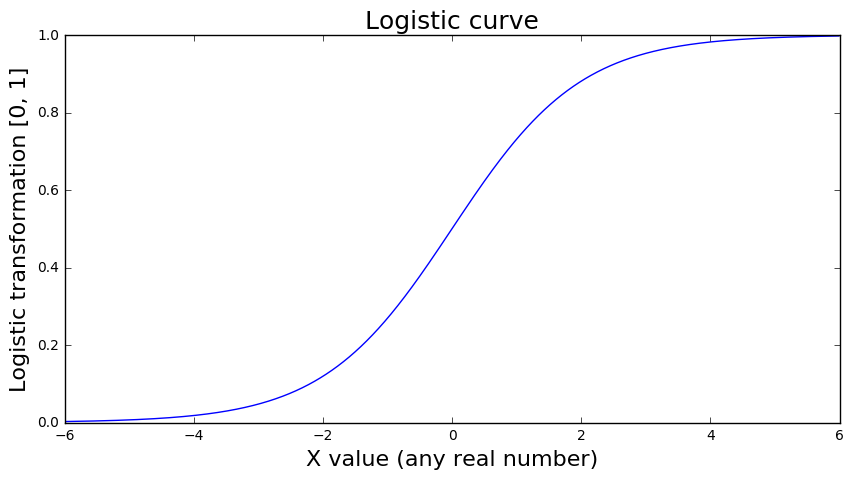

In [26]:
x = np.arange(-6, 6, .01)
y = map(lambda v: 1.0 / (1.0 + math.exp(-1 * v)), x)
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.title('Logistic curve', fontsize=18)
plt.xlabel('X value (any real number)', fontsize=16)
plt.ylabel('Logistic transformation [0, 1]', fontsize=16)
plt.show()

In [31]:
dname = '../../methods/2017/audio/who-speaking-raw/'

In [51]:
def show_waveform(fname, offset):
    rate, data = wav.read(fname)
    plt.figure(figsize=(10,3))
    plt.plot(data[offset*rate:int(offset+3.5)*rate])
    plt.show()

### Waveforms

The two plots below should look familiar to most readers.  They are waveforms from audio of Linh Da and Kyle speaking.  Kyle made Linh Da predict which is which in the episode.  You can see from the filenames who the actual speaker is, but this test is a bit unfair as determining a speaker from waveforms, while possible, is a formitable challenge for typical speech.

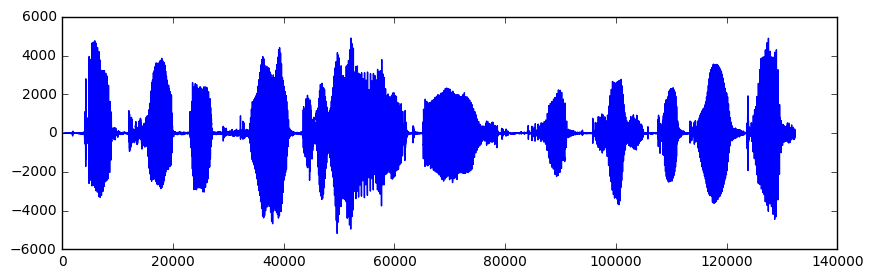

In [52]:
show_waveform(dname + 'linhda.wav', 0)

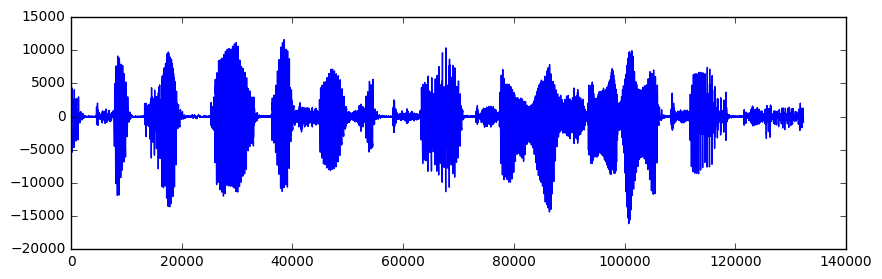

In [53]:
show_waveform(dname + 'kyle.wav', 1)

## Frequency Spectra

The plots below are samples of the frequency spectra for hosts Linh Da and Kyle.  While you might not be able to explicitly tell who is who from these plots, can you determine that each is generated from a unique and distinct source?  If so, your eye is discriminating enough to solve this problem, so we expect a logistic regression should be also.

In [127]:
def get_spectra(fname, start, stop, window):
    rate, data = wav.read(fname)
    bands = []
    for i in np.arange(start, stop, window):
        a = data[int(i*rate):int((i+.5)*rate)]
        b=[(ele/2**8.)*2-1 for ele in a]
        c = fft(b)
        d = len(c)/2
        f = abs(c[:(d-1)])
        bands.append(f[0:1000])
    nbands = np.array(bands)
    i=0
    for nb in nbands:
        nbands[i] = map(lambda x: x**.5, nb)
        i+=1
    return nbands

In [128]:
lbands = get_spectra(dname + 'linhda.wav', 0, 800, .25)

In [129]:
kbands = get_spectra(dname + 'kyle.wav', 0, 800, .25)

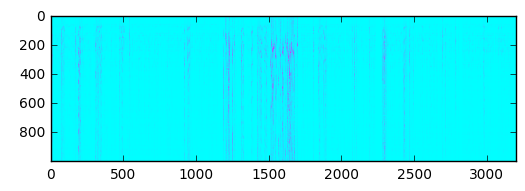

In [130]:
plt.imshow(lbands.transpose(), cmap='cool', interpolation='nearest')
plt.show()

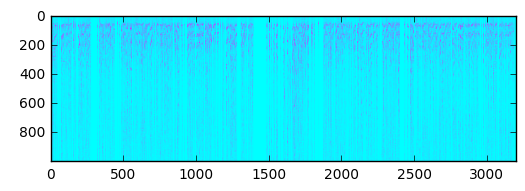

In [131]:
plt.imshow(kbands.transpose(), cmap='cool', interpolation='nearest')
plt.show()

## Feature Engineering

From the transformed frequency data, we can bin ranges of values and use those numeric inputs as our features for the logistic regression model.  Essentially, we are asking it to find the best $\beta_i$ each band $X_i$ such that when we do a linear combination (sum) of each band times its weight (the $\beta_i$ parameter), we can take that value, apply the logistic transformation, and then compare against a cut off point to do our classification.

Again, stay tuned to the [dataskeptic.com](http://dataskeptic.com) blog this week for updates on this project and more details about these steps.